# Run Any Kind of OLS Regression (ANOVA, GLM, etc.)

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to run/test a statistical model (e.g., regression or T-tests) on a spreadsheet.

Notes:
- To best use this notebook, you should be familar with GLM design and Contrast Matrix design. See this webpage to get started:
[FSL's GLM page](https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/GLM)

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

Prep Output Direction

In [1]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/DBS_studies_influencing_memory/analyses'

Import Data

In [2]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/cognition_2023/revisions/revisionsdata.csv'
sheet = None #'master_list_proper_subjects'

In [3]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [4]:
data_df.columns

Index(['Dataset', 'Subject', 'Nifti_File_Path', 'age', 'z_scored_improvement',
       'sbc_conn', 'sex', 'DatasetInt', 'Baseline_Cognitive_Score',
       'Frequency', 'Pulse_Width__uS_', 'Amperage__mA_'],
      dtype='object')

In [5]:
drop_list = ["z_scored_improvement", 'sbc_conn']

In [6]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
data_df

,Dataset,Subject,Nifti_File_Path,age,z_scored_improvement,sbc_conn,sex,DatasetInt,Baseline_Cognitive_Score,Frequency,Pulse_Width__uS_,Amperage__mA_
0,AD Fornix DBS,1203,/Users/cu135/Partners HealthCare Dropbox/Calvi...,76,-72.607386,70.124471,m,1,28.0,130,90,3.5
1,AD Fornix DBS,1202,/Users/cu135/Partners HealthCare Dropbox/Calvi...,74,-1.529691,51.103184,m,1,22.0,130,90,3.5
2,AD Fornix DBS,1201,/Users/cu135/Partners HealthCare Dropbox/Calvi...,78,-6.416910,52.243723,m,1,19.0,130,90,3.5
3,AD Fornix DBS,150,/Users/cu135/Partners HealthCare Dropbox/Calvi...,71,14.362311,73.488381,m,1,17.0,130,90,3.5
4,AD Fornix DBS,149,/Users/cu135/Partners HealthCare Dropbox/Calvi...,77,-89.274052,62.007555,m,1,19.0,130,90,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...
77,PD STN DBS,MDST06,/Users/cu135/Partners HealthCare Dropbox/Calvi...,60,0.245073,23.577739,m,2,143.0,150,50,3.5
79,PD STN DBS,MDST04,/Users/cu135/Partners HealthCare Dropbox/Calvi...,50,-0.282257,21.207602,m,2,NaN,130,60,3.5
80,PD STN DBS,MDST03,/Users/cu135/Partners HealthCare Dropbox/Calvi...,62,-0.005890,30.900051,f,2,0.0,130,60,3.5
81,PD STN DBS,MDST02,/Users/cu135/Partners HealthCare Dropbox/Calvi...,50,1.294321,16.295870,f,2,2.0,130,60,3.5


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [7]:
data_df.columns

Index(['Dataset', 'Subject', 'Nifti_File_Path', 'age', 'z_scored_improvement',
       'sbc_conn', 'sex', 'DatasetInt', 'Baseline_Cognitive_Score',
       'Frequency', 'Pulse_Width__uS_', 'Amperage__mA_'],
      dtype='object')

Set the parameters for dropping rows

In [8]:
column = 'Dataset'  # The column you'd like to evaluate
condition = 'not'  # The condition to check ('equal', 'above', 'below', 'not')
value = 'AD Fornix DBS' # The value to drop if T

In [9]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,Dataset,Subject,Nifti_File_Path,age,z_scored_improvement,sbc_conn,sex,DatasetInt,Baseline_Cognitive_Score,Frequency,Pulse_Width__uS_,Amperage__mA_
0,AD Fornix DBS,1203,/Users/cu135/Partners HealthCare Dropbox/Calvi...,76,-72.607386,70.124471,m,1,28.0,130,90,3.5
1,AD Fornix DBS,1202,/Users/cu135/Partners HealthCare Dropbox/Calvi...,74,-1.529691,51.103184,m,1,22.0,130,90,3.5
2,AD Fornix DBS,1201,/Users/cu135/Partners HealthCare Dropbox/Calvi...,78,-6.416910,52.243723,m,1,19.0,130,90,3.5
3,AD Fornix DBS,150,/Users/cu135/Partners HealthCare Dropbox/Calvi...,71,14.362311,73.488381,m,1,17.0,130,90,3.5
4,AD Fornix DBS,149,/Users/cu135/Partners HealthCare Dropbox/Calvi...,77,-89.274052,62.007555,m,1,19.0,130,90,3.5
5,AD Fornix DBS,148,/Users/cu135/Partners HealthCare Dropbox/Calvi...,51,-206.966360,75.739873,m,1,13.0,130,90,3.5
6,AD Fornix DBS,147,/Users/cu135/Partners HealthCare Dropbox/Calvi...,59,-4.035957,69.447270,m,1,13.0,130,90,3.5
7,AD Fornix DBS,146,/Users/cu135/Partners HealthCare Dropbox/Calvi...,76,-53.819507,46.331586,m,1,24.0,130,90,3.5
8,AD Fornix DBS,145,/Users/cu135/Partners HealthCare Dropbox/Calvi...,74,6.281503,85.082502,m,1,23.0,130,90,3.5
9,AD Fornix DBS,144,/Users/cu135/Partners HealthCare Dropbox/Calvi...,79,-60.812514,58.899731,m,1,13.0,130,90,3.5


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [10]:
data_df.columns

Index(['Dataset', 'Subject', 'Nifti_File_Path', 'age', 'z_scored_improvement',
       'sbc_conn', 'sex', 'DatasetInt', 'Baseline_Cognitive_Score',
       'Frequency', 'Pulse_Width__uS_', 'Amperage__mA_'],
      dtype='object')

In [11]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['subid', 'Dataset'] #['Age']
# drop_list = ['CorrWithSiddiqiMap', 'depression_raw_baeline', 'depression_raw_follow_up']

In [12]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Unable to standardize column Nifti_File_Path.
Unable to standardize column sex.


/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Work/Software/calvin_utils_project/calvin_utils_project/calvin_utils/permutation_analysis_utils/statsmodels_palm.py:158: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 1.0777939   0.82479064  1.33079717  0.44528574  1.20429553 -2.08474689
 -1.07273384  1.0777939   0.82479064  1.4572988   0.44528574  1.20429553
  0.57178738  0.69828901 -1.19923547  0.57178738 -1.3257371  -1.3257371
 -0.18722242  0.82479064  0.06578085 -0.18722242  0.19228248  0.57178738
  0.82479064  0.19228248  0.69828901 -0.81973057 -2.59075342 -1.19923547
  0.57178738  0.06578085  0.95129227 -1.95824526 -0.06072078 -0.94623221
 -0.06072078  0.19228248  0.19228248 -0.69322894  0.57178738  0.57178738
 -0.94623221 -0.44022568 -0.18722242 -2.21124852 -0.31372405  1.0777939
  1.20429553 -0.69322894]' has dtype incompatible with int64, please explicitly cast to a compati

,Dataset,Subject,Nifti_File_Path,age,z_scored_improvement,sbc_conn,sex,DatasetInt,Baseline_Cognitive_Score,Frequency,Pulse_Width__uS_,Amperage__mA_
0,AD Fornix DBS,3.955865,/Users/cu135/Partners HealthCare Dropbox/Calvi...,1.077794,-0.780994,0.376909,m,NaN,-0.028067,-0.294884,0.294884,NaN
1,AD Fornix DBS,3.951961,/Users/cu135/Partners HealthCare Dropbox/Calvi...,0.824791,0.688731,-1.873065,m,NaN,-0.207219,-0.294884,0.294884,NaN
2,AD Fornix DBS,3.948056,/Users/cu135/Partners HealthCare Dropbox/Calvi...,1.330797,0.587675,-1.738154,m,NaN,-0.296795,-0.294884,0.294884,NaN
3,AD Fornix DBS,-0.155879,/Users/cu135/Partners HealthCare Dropbox/Calvi...,0.445286,1.017342,0.774817,m,NaN,-0.356512,-0.294884,0.294884,NaN
4,AD Fornix DBS,-0.159784,/Users/cu135/Partners HealthCare Dropbox/Calvi...,1.204296,-1.125623,-0.583218,m,NaN,-0.296795,-0.294884,0.294884,NaN
5,AD Fornix DBS,-0.163689,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-2.084747,-3.559233,1.041139,m,NaN,-0.475947,-0.294884,0.294884,NaN
6,AD Fornix DBS,-0.167594,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-1.072734,0.636908,0.296805,m,NaN,-0.475947,-0.294884,0.294884,NaN
7,AD Fornix DBS,-0.171498,/Users/cu135/Partners HealthCare Dropbox/Calvi...,1.077794,-0.392503,-2.437484,m,NaN,-0.147502,-0.294884,0.294884,NaN
8,AD Fornix DBS,-0.175403,/Users/cu135/Partners HealthCare Dropbox/Calvi...,0.824791,0.850249,2.146253,m,NaN,-0.177360,-0.294884,0.294884,NaN
9,AD Fornix DBS,-0.179308,/Users/cu135/Partners HealthCare Dropbox/Calvi...,1.457299,-0.537103,-0.950833,m,NaN,-0.475947,-0.294884,0.294884,NaN


In [13]:
data_df.columns

Index(['Dataset', 'Subject', 'Nifti_File_Path', 'age', 'z_scored_improvement',
       'sbc_conn', 'sex', 'DatasetInt', 'Baseline_Cognitive_Score',
       'Frequency', 'Pulse_Width__uS_', 'Amperage__mA_'],
      dtype='object')

Regress out Covariate

In [14]:
# from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
# # use this code block to regress out covariates. Generally better to just include as covariates in a model..
# dependent_variable_list = lis
# regressors = ['Age', 'Sex']

# data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
# print(adjusted_dep_vars_list)

Edit Column Values

In [15]:
data_df.columns

Index(['Dataset', 'Subject', 'Nifti_File_Path', 'age', 'z_scored_improvement',
       'sbc_conn', 'sex', 'DatasetInt', 'Baseline_Cognitive_Score',
       'Frequency', 'Pulse_Width__uS_', 'Amperage__mA_'],
      dtype='object')

In [16]:
data_df.columns

Index(['Dataset', 'Subject', 'Nifti_File_Path', 'age', 'z_scored_improvement',
       'sbc_conn', 'sex', 'DatasetInt', 'Baseline_Cognitive_Score',
       'Frequency', 'Pulse_Width__uS_', 'Amperage__mA_'],
      dtype='object')

In [17]:
from calvin_utils.file_utils.dataframe_utilities import convert_to_ordinal
# data_df, map = convert_to_ordinal(data_df, ['Disease'])

# 02 - Define Your Formula

This is the formula relating outcome to predictors, and takes the form:
- y = B0 + B1 + B2 + B3 + . . . BN

It is defined using the columns of your dataframe instead of the variables above:
- 'Apples_Picked ~ hours_worked + owns_apple_picking_machine'

____
**ANOVA**
- Tests differences in means for one categorical variable.
- formula = 'Outcome ~ C(Group1)'

**2-Way ANOVA**
- Tests differences in means for two categorical variables without interaction.
- formula = 'Outcome ~ C(Group1) + C(Group2)'

**2-Way ANOVA with Interaction**
- Tests for interaction effects between two categorical variables.
- formula = 'Outcome ~ C(Group1) * C(Group2)'

**ANCOVA**
- Similar to ANOVA, but includes a covariate to control for its effect.
- formula = 'Outcome ~ C(Group1) + Covariate'

**2-Way ANCOVA**
- Extends ANCOVA with two categorical variables and their interaction, controlling for a covariate.
- formula = 'Outcome ~ C(Group1) * C(Group2) + Covariate'

**Multiple Regression**
- Assesses the impact of multiple predictors on an outcome.
- formula = 'Outcome ~ Predictor1 + Predictor2'

**Simple Linear Regression**
- Assesses the impact of a single predictor on an outcome.
- formula = 'Outcome ~ Predictor'

**MANOVA**
- Assesses multiple dependent variables across groups.
- Note: Not typically set up with a formula in statsmodels. Requires specialized functions.

____
Use the printout below to design your formula. 
- Left of the "~" symbol is the thing to be predicted. 
- Right of the "~" symbol are the predictors. 
- ":" indicates an interaction between two things. 
- "*" indicates and interactions AND it accounts for the simple effects too. 
- "+" indicates that you want to add another predictor. 

In [18]:
data_df.columns

Index(['Dataset', 'Subject', 'Nifti_File_Path', 'age', 'z_scored_improvement',
       'sbc_conn', 'sex', 'DatasetInt', 'Baseline_Cognitive_Score',
       'Frequency', 'Pulse_Width__uS_', 'Amperage__mA_'],
      dtype='object')

In [19]:
data_df.columns

Index(['Dataset', 'Subject', 'Nifti_File_Path', 'age', 'z_scored_improvement',
       'sbc_conn', 'sex', 'DatasetInt', 'Baseline_Cognitive_Score',
       'Frequency', 'Pulse_Width__uS_', 'Amperage__mA_'],
      dtype='object')

In [20]:
formula = "z_scored_improvement ~ sbc_conn * age + Dataset"

# 02 - Visualize Your Design Matrix

This is the explanatory variable half of your regression formula
_______________________________________________________
Create Design Matrix: Use the create_design_matrix method. You can provide a list of formula variables which correspond to column names in your dataframe.

- design_matrix = palm.create_design_matrix(formula_vars=["var1", "var2", "var1*var2"])
- To include interaction terms, use * between variables, like "var1*var2".
- By default, an intercept will be added unless you set intercept=False
- **don't explicitly add the 'intercept' column. I'll do it for you.**

In [21]:
# Define the design matrix
outcome_matrix, design_matrix = cal_palm.define_design_matrix(formula, data_df)
design_matrix

,Intercept,sbc_conn,age,sbc_conn:age
0,1.0,0.376909,1.077794,0.406231
1,1.0,-1.873065,0.824791,-1.544886
2,1.0,-1.738154,1.330797,-2.313130
3,1.0,0.774817,0.445286,0.345015
4,1.0,-0.583218,1.204296,-0.702366
5,1.0,1.041139,-2.084747,-2.170512
6,1.0,0.296805,-1.072734,-0.318393
7,1.0,-2.437484,1.077794,-2.627105
8,1.0,2.146253,0.824791,1.770209
9,1.0,-0.950833,1.457299,-1.385648


# 03 - Visualize Your Dependent Variable

I have generated this for you based on the formula you provided

In [22]:
outcome_matrix

,z_scored_improvement
0,-0.780994
1,0.688731
2,0.587675
3,1.017342
4,-1.125623
5,-3.559233
6,0.636908
7,-0.392503
8,0.850249
9,-0.537103


# 04 - Run the Regression

Regression Results Are Displayed Below

Run one-shot (no cross-validation)

In [23]:
from calvin_utils.statistical_utils.symbolic_regression import LeanSymbolicRegressor
X = design_matrix.values
y = outcome_matrix.values
sr = LeanSymbolicRegressor()
sr.fit_one_shot(X, y)         # numpy arrays or pandas objects
sr.summary(X, y)         # prints CV R², OLS refit metrics & coefficients
sr.cleanup_scratch()

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


/Users/cu135/.virtualenvs/Python_3.7.7_nimlab/lib/python3.11/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
[ Info: Started!
[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           1.000e+00  1.594e+01  y = 9.6307e-06
3           9.404e-01  3.075e-02  y = x₃ / 3.9557
5           7.643e-01  1.037e-01  y = -0.025066 / (x₁ + -1.0325)
7           7.043e-01  4.088e-02  y = (x₁ * 0.13467) / (2.0456 + x₂)
9           6.749e-01  2.127e-02  y = x₁ * ((0.10838 / (x₂ + 2.0543)) - -0.18016)
11          6.553e-01  1.479e-02  y = (x₂ / (x₂ + 2.0674)) * (0.041049 / (x₃ + 0.29344))
13          5.657e-01  7.351e-02  y = (((x₂ / (x₂ + 2.0572)) + 0.88439) * 0.085996) / (x₃ + ...
                                      0.29263)
17          5.646e-01  4.815e-04  y = ((x₂ - -1.8193) + (x₂ / (x₂ + 2.0674))) * ((0.041049 /...
                                       (x₃ + 0.29344)) / 0.73999)
19          5.313e-01  3.033e-02  y = x₁ * (((0.1343 / (x₂ + 2.0492)) - (-0.13521 * x₁)) + (...
                                      (-0.092001 / (

Visualize Response Surface

In [24]:
sr.set_expression(0)  # Set the expression to the first one

Selected equation (index 0): 0.00000963071800000000


In [25]:
# Prepare X and y for the regressor
from calvin_utils.statistical_utils.response_surface_utils.general_response_surface import GeneralModelPlot
gmp = GeneralModelPlot(model_predict=sr.predict_chosen, X_data=X, Y_data=y, feature_names=list(design_matrix.columns))
gmp.plot_with_sliders(num_slices=50, var_idx1=1, var_idx2=2, limit_z=False)

<AxesSubplot: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted', ylabel='Residual'>

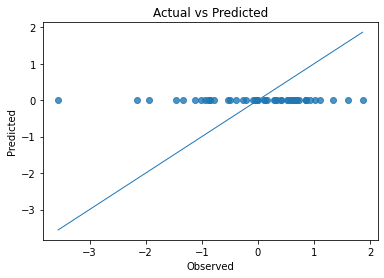

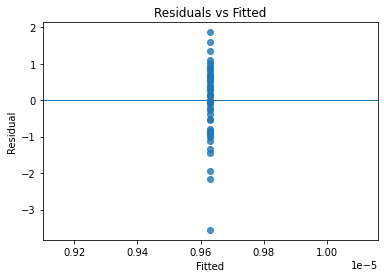

In [26]:
sr.plot_actual_vs_pred(X, y)
sr.plot_residuals(X, y)